In [1]:
import os
import sys

project_root = os.getcwd()
while project_root.split("\\")[-1].lower() not in  ["computervisionsoc", "computervisionsociety"]:
    project_root = os.path.abspath(os.path.join(project_root, '..'))

sys.path.append(project_root)

In [2]:
from CV101.models import Sequential, load_model
from CV101.optimizers import SGD, Momentum, RMSprop, Adam
from CV101.metrics import accuracy, mae, precision, recall
from CV101.layers import Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization, Flatten
from CV101.losses import MeanSquaredError, CategoricalCrossEntropy, BinaryCrossEntropy
from CV101.activations import ReLU, LeakyReLU, ELU, Sigmoid, Tanh, Linear
from CV101.initializers import HeInitializer, XavierInitializer
from CV101.regularizers import regularizers

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

while os.getcwd().split("\\")[-1].lower() not in ["computervisionsoc", "computervisionsociety"]:
    os.chdir("..")
train = pd.read_csv("datasets\\titanic\\train.csv", index_col="PassengerId")

train.drop(columns=["Ticket", "Cabin", "Name"], inplace=True)

cleaned = train.dropna()

encoder = OneHotEncoder(sparse_output=False)
encoded = np.array(encoder.fit_transform(cleaned[["Sex", "Embarked"]]))
encoded_name = encoder.get_feature_names_out(["Sex", "Embarked"])


encoded_df = pd.DataFrame(encoded, columns=encoded_name, index=cleaned.index)


training = pd.concat([cleaned, encoded_df], axis=1)
training.drop(columns=["Sex", "Embarked"], inplace=True)

X_train = training.drop(columns=["Survived"])
y_train = training[["Survived"]].copy()

X, y, X_val, y_val = X_train[:600], y_train[:600], X_train[600:], y_train[600:]
X.shape, y.shape, X_val.shape, y_val.shape

((600, 10), (600, 1), (112, 10), (112, 1))

## 1. Gradient Vanishing

In [41]:
model = Sequential()
model.add(Dense(32, activation=Tanh(), initializer=XavierInitializer(mode="uniform")))
model.add(Dense(32, activation=Tanh(), initializer=XavierInitializer(mode="uniform")))
model.add(Dense(32, activation=Sigmoid(), initializer=XavierInitializer(mode="uniform")))
model.add(Dense(32, activation=Tanh(), initializer=XavierInitializer(mode="uniform")))
model.add(Dense(32, activation=Sigmoid(), initializer=XavierInitializer(mode="uniform")))
model.add(Dense(32, activation=Sigmoid(), initializer=XavierInitializer(mode="uniform")))
model.add(Dense(32, activation=Tanh(), initializer=XavierInitializer(mode="uniform")))
model.add(Dense(10, activation=Sigmoid(), initializer=XavierInitializer(mode="uniform")))
model.add(Dense(1, activation=Sigmoid(), initializer=XavierInitializer(mode="uniform")))


model.compile(loss=BinaryCrossEntropy(), optimizer=Adam(learning_rate=1e-6))

In [42]:
model.predict(X)[:10]

array([[0.45665329],
       [0.45673525],
       [0.45667247],
       [0.45675683],
       [0.45669186],
       [0.45659592],
       [0.45664269],
       [0.45665282],
       [0.45669075],
       [0.45665303]])

In [43]:
model.fit(X, y, epoch=10)

Epoch 1/10 - 10 batches
train_loss: 0.673722 - 
Epoch 2/10 - 10 batches
train_loss: 0.673703 - 
Epoch 3/10 - 10 batches
train_loss: 0.673683 - 
Epoch 4/10 - 10 batches
train_loss: 0.673664 - 
Epoch 5/10 - 10 batches
train_loss: 0.673644 - 
Epoch 6/10 - 10 batches
train_loss: 0.673624 - 
Epoch 7/10 - 10 batches
train_loss: 0.673605 - 
Epoch 8/10 - 10 batches
train_loss: 0.673585 - 
Epoch 9/10 - 10 batches
train_loss: 0.673565 - 
Epoch 10/10 - 10 batches
train_loss: 0.673546 - 


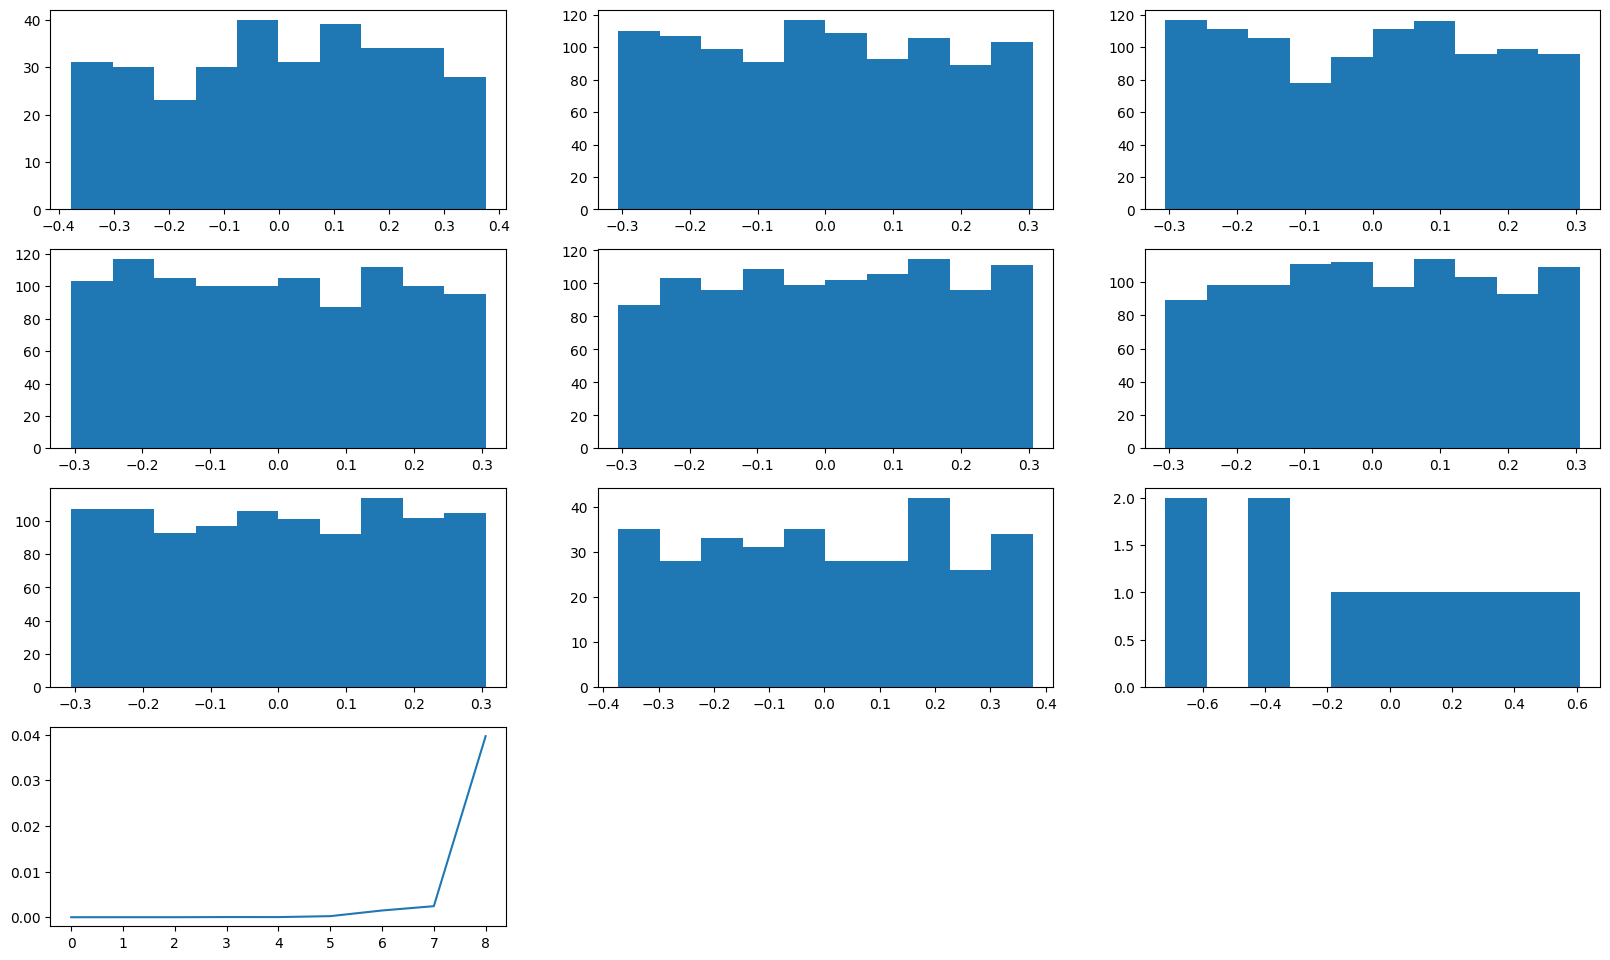

In [44]:
def plot_W(model):
    plt.figure(figsize=(20, 15))
    length = len(model.layers)
    for count, layer in enumerate(model.layers):
        W = layer.W
        plt.subplot(length//3+2, 3, count+1)
        plt.hist(W.reshape(-1))

    mean_val = [np.mean(np.abs((layer.dW))) for layer in model.layers]
    plt.subplot(length//3+2, 3, length+1)
    plt.plot(mean_val)
    
    
    plt.show()

plot_W(model)

In [45]:
model.fit(X, y, epoch=1000)

Epoch 1/1000 - 10 batches
train_loss: 0.673526 - 
Epoch 2/1000 - 10 batches
train_loss: 0.673507 - 
Epoch 3/1000 - 10 batches
train_loss: 0.673487 - 
Epoch 4/1000 - 10 batches
train_loss: 0.673467 - 
Epoch 5/1000 - 10 batches
train_loss: 0.673448 - 
Epoch 6/1000 - 10 batches
train_loss: 0.673428 - 
Epoch 7/1000 - 10 batches
train_loss: 0.673409 - 
Epoch 8/1000 - 10 batches
train_loss: 0.673389 - 
Epoch 9/1000 - 10 batches
train_loss: 0.67337 - 
Epoch 10/1000 - 10 batches
train_loss: 0.673351 - 
Epoch 11/1000 - 10 batches
train_loss: 0.673331 - 
Epoch 12/1000 - 10 batches
train_loss: 0.673312 - 
Epoch 13/1000 - 10 batches
train_loss: 0.673292 - 
Epoch 14/1000 - 10 batches
train_loss: 0.673273 - 
Epoch 15/1000 - 10 batches
train_loss: 0.673254 - 
Epoch 16/1000 - 10 batches
train_loss: 0.673234 - 
Epoch 17/1000 - 10 batches
train_loss: 0.673215 - 
Epoch 18/1000 - 10 batches
train_loss: 0.673196 - 
Epoch 19/1000 - 10 batches
train_loss: 0.673177 - 
Epoch 20/1000 - 10 batches
train_loss: 0.

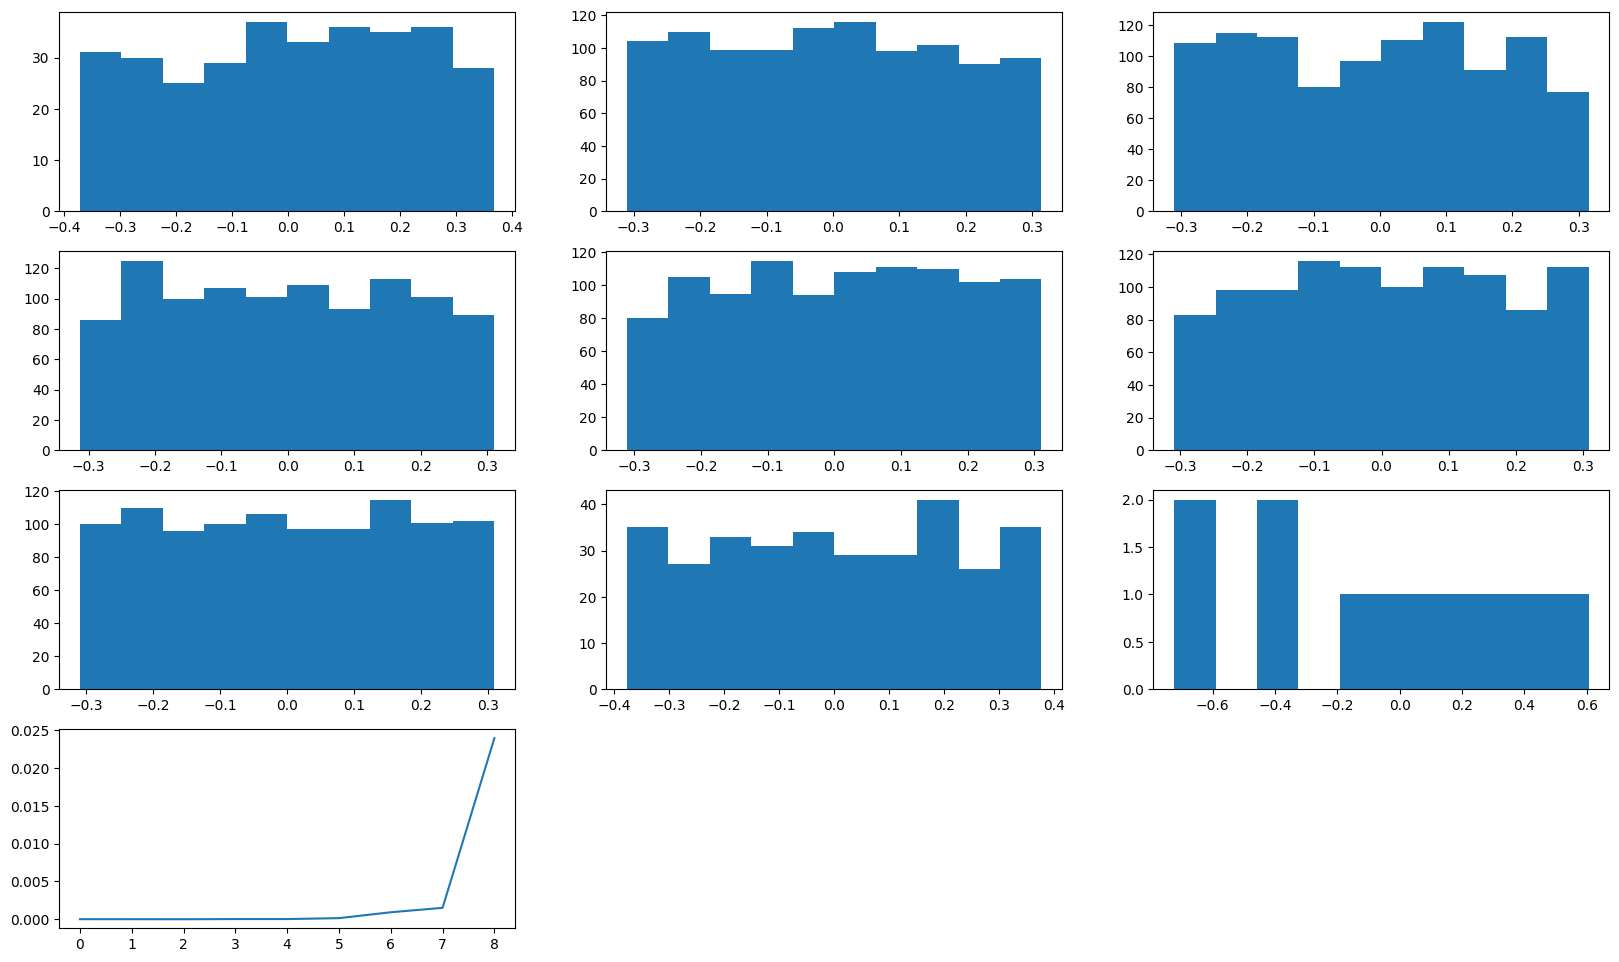

In [46]:
plot_W(model)

## 2. Gradient exploding

In [57]:
model = Sequential()
model.add(Dense(40, activation=ReLU()))
model.add(Dense(40, activation=ReLU()))
model.add(Dense(40, activation=ReLU()))
model.add(Dense(40, activation=ReLU()))
model.add(Dense(40, activation=ReLU()))
model.add(Dense(40, activation=ReLU()))
model.add(Dense(32, activation=ReLU()))
model.add(Dense(10, activation=ReLU()))
model.add(Dense(1, activation=Sigmoid()))


model.compile(loss=BinaryCrossEntropy(), optimizer=Adam(learning_rate=1e-2))

In [58]:
model.predict(X)[:10]

array([[0.50000253],
       [0.50000253],
       [0.50000253],
       [0.50000253],
       [0.50000253],
       [0.50000253],
       [0.50000253],
       [0.50000253],
       [0.50000253],
       [0.50000253]])

In [59]:
model.fit(X, y, epoch=1)

Epoch 1/1 - 10 batches
train_loss: 0.677587 - 


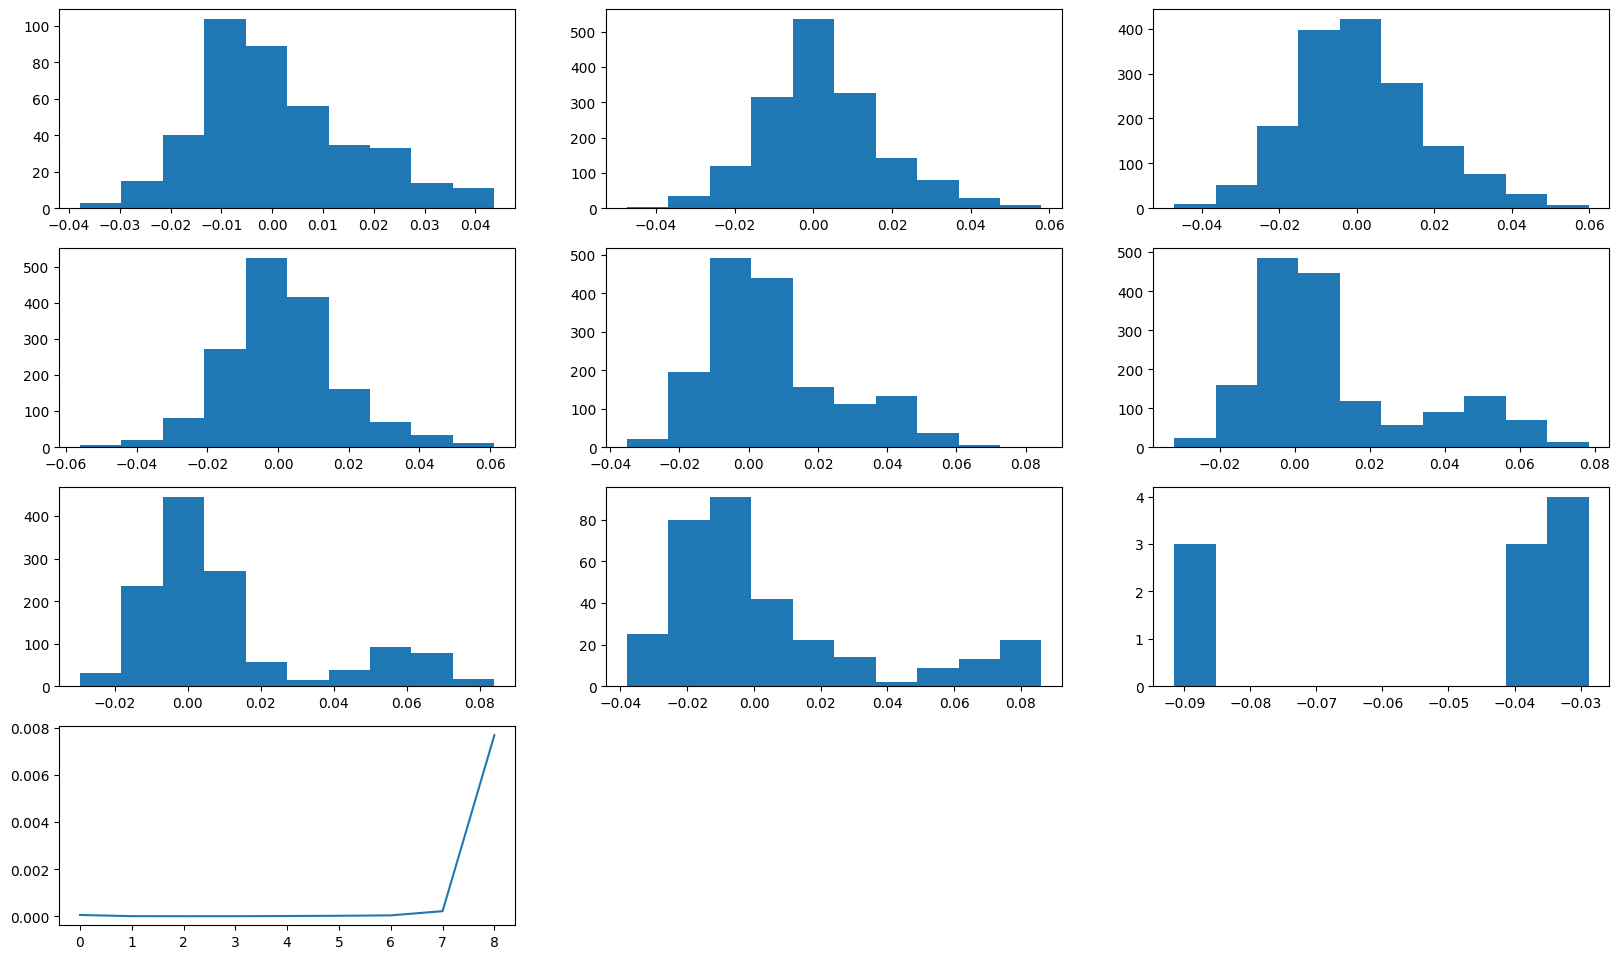

In [60]:
plot_W(model)

In [61]:
model.fit(X, y, epoch=1000)

Epoch 1/1000 - 10 batches
train_loss: 0.66053 - 
Epoch 2/1000 - 10 batches
train_loss: 0.605931 - 
Epoch 3/1000 - 10 batches
train_loss: 0.631579 - 
Epoch 4/1000 - 10 batches
train_loss: 0.571925 - 
Epoch 5/1000 - 10 batches
train_loss: 0.582908 - 
Epoch 6/1000 - 10 batches
train_loss: 0.534185 - 
Epoch 7/1000 - 10 batches
train_loss: 0.540845 - 
Epoch 8/1000 - 10 batches
train_loss: 0.501388 - 
Epoch 9/1000 - 10 batches
train_loss: 0.585106 - 
Epoch 10/1000 - 10 batches
train_loss: 0.536626 - 
Epoch 11/1000 - 10 batches
train_loss: 0.562381 - 
Epoch 12/1000 - 10 batches
train_loss: 0.553253 - 
Epoch 13/1000 - 10 batches
train_loss: 0.517645 - 
Epoch 14/1000 - 10 batches
train_loss: 0.495661 - 
Epoch 15/1000 - 10 batches
train_loss: 0.505565 - 
Epoch 16/1000 - 10 batches
train_loss: 0.520427 - 
Epoch 17/1000 - 10 batches
train_loss: 0.561352 - 
Epoch 18/1000 - 10 batches
train_loss: 0.476688 - 
Epoch 19/1000 - 10 batches
train_loss: 0.522189 - 
Epoch 20/1000 - 10 batches
train_loss: 0.

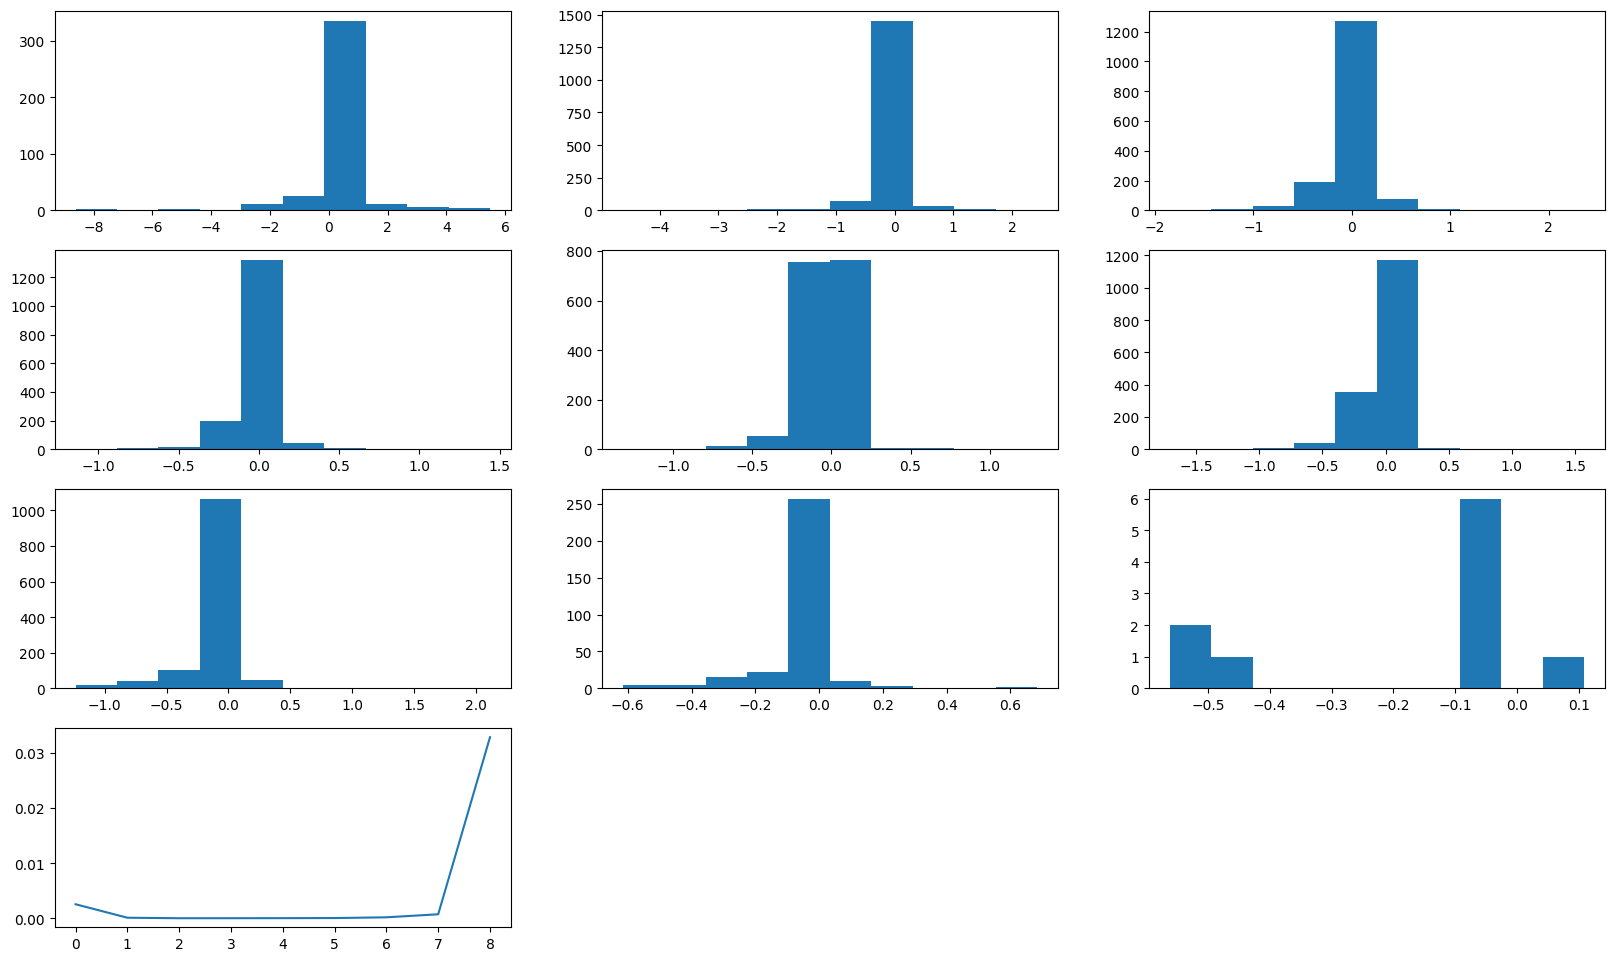

In [62]:
plot_W(model)

## 3. Overfitting

In [17]:
model = Sequential()
model.add(Dense(256, activation=ReLU(), initializer=HeInitializer(mode="Normal")))
model.add(Dense(128, activation=ReLU(), initializer=HeInitializer(mode="Normal")))
model.add(Dense(64, activation=ReLU(), initializer=HeInitializer(mode="Normal")))
model.add(Dense(32, activation=ReLU(), initializer=HeInitializer(mode="Normal")))
model.add(Dense(10, activation=ReLU(), initializer=HeInitializer(mode="Normal")))
model.add(Dense(1, activation=Sigmoid(), initializer=XavierInitializer(mode="Normal")))


model.compile(loss=BinaryCrossEntropy(), optimizer=Adam(learning_rate=1e-4), metrics=[accuracy])

In [18]:
model.predict(X)[:10]

array([[0.03084519],
       [0.74535349],
       [0.00477543],
       [0.33112363],
       [0.0017551 ],
       [0.06209025],
       [0.9273903 ],
       [0.00224702],
       [0.64119999],
       [0.8295917 ]])

In [19]:
model.fit(X, y, epoch=1000, validation_data = [X_val, y_val])

Epoch 1/1000 - 10 batches
train_loss: 0.570801 - train_accuracy: 0.7 - val_loss: 0.813312 - val_accuracy: 0.625 - 
Epoch 2/1000 - 10 batches
train_loss: 0.613356 - train_accuracy: 0.616667 - val_loss: 0.657951 - val_accuracy: 0.571429 - 
Epoch 3/1000 - 10 batches
train_loss: 0.509475 - train_accuracy: 0.75 - val_loss: 0.649524 - val_accuracy: 0.696429 - 
Epoch 4/1000 - 10 batches
train_loss: 0.508265 - train_accuracy: 0.7 - val_loss: 0.581907 - val_accuracy: 0.714286 - 
Epoch 5/1000 - 10 batches
train_loss: 0.543717 - train_accuracy: 0.766667 - val_loss: 0.56923 - val_accuracy: 0.705357 - 
Epoch 6/1000 - 10 batches
train_loss: 0.502117 - train_accuracy: 0.75 - val_loss: 0.562953 - val_accuracy: 0.758929 - 
Epoch 7/1000 - 10 batches
train_loss: 0.516263 - train_accuracy: 0.7 - val_loss: 0.573855 - val_accuracy: 0.723214 - 
Epoch 8/1000 - 10 batches
train_loss: 0.51347 - train_accuracy: 0.75 - val_loss: 0.561266 - val_accuracy: 0.732143 - 
Epoch 9/1000 - 10 batches
train_loss: 0.497242 -

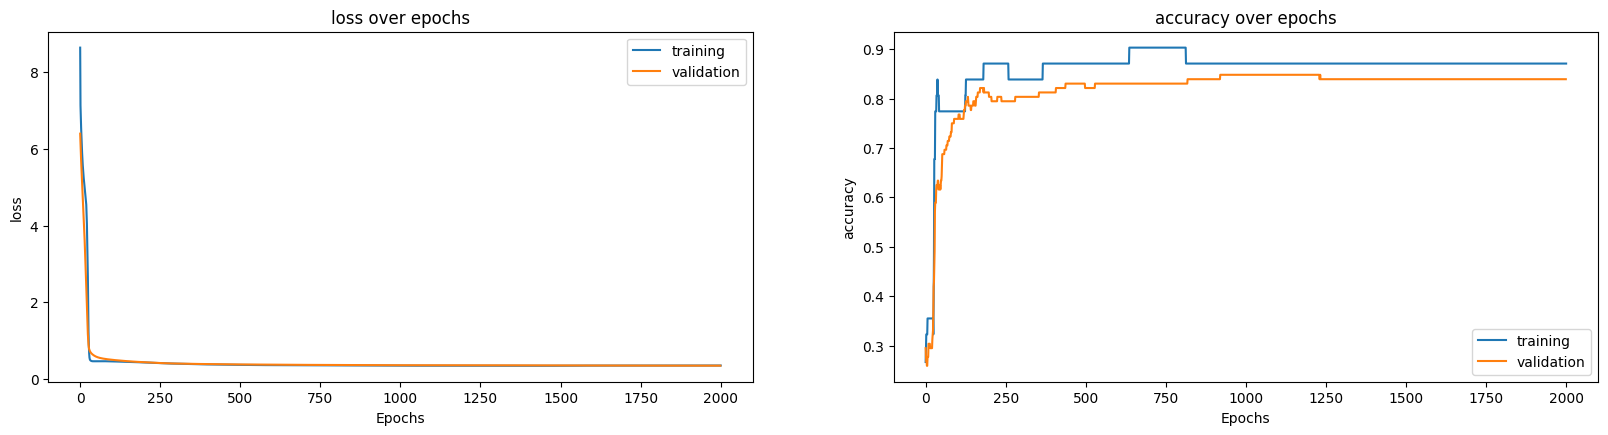

In [80]:
def plot_metric(model):
    plt.figure(figsize=(20, 10))
    length = len(model.hist)
    for count, metric in enumerate(model.hist):
        train_metric = model.hist[metric]["train"]
        val_metric = model.hist[metric]["val"]
    
        plt.subplot(length//2 + 1, 2, count+1)

        plt.xlabel("Epochs")
        plt.ylabel(metric)
        plt.title(f"{metric} over epochs")
        
        plt.plot(train_metric, label="training")
        plt.plot(val_metric, label="validation")

        plt.legend()
    
    plt.show()

plot_metric(model)

## 4. Underfitting

In [21]:
model = Sequential()

model.add(Dense(1, activation=Sigmoid()))

model.compile(loss=BinaryCrossEntropy(), optimizer=SGD(learning_rate=5e-2), metrics=[accuracy])

In [22]:
model.predict(X)[:10]

array([[0.44683306],
       [0.31261822],
       [0.44379276],
       [0.34620037],
       [0.41933009],
       [0.30862019],
       [0.46330808],
       [0.43555003],
       [0.42796602],
       [0.47513889]])

In [23]:
model.fit(X, y, epoch=1000, validation_data=[X_val, y_val])

Epoch 1/1000 - 10 batches
train_loss: 0.706784 - train_accuracy: 0.766667 - val_loss: 1.852933 - val_accuracy: 0.598214 - 
Epoch 2/1000 - 10 batches
train_loss: 3.975762 - train_accuracy: 0.733333 - val_loss: 2.978582 - val_accuracy: 0.723214 - 
Epoch 3/1000 - 10 batches
train_loss: 3.765168 - train_accuracy: 0.733333 - val_loss: 2.729271 - val_accuracy: 0.723214 - 
Epoch 4/1000 - 10 batches
train_loss: 3.558054 - train_accuracy: 0.766667 - val_loss: 3.002368 - val_accuracy: 0.705357 - 
Epoch 5/1000 - 10 batches
train_loss: 2.1275 - train_accuracy: 0.766667 - val_loss: 1.635225 - val_accuracy: 0.723214 - 
Epoch 6/1000 - 10 batches
train_loss: 3.541499 - train_accuracy: 0.766667 - val_loss: 3.006114 - val_accuracy: 0.705357 - 
Epoch 7/1000 - 10 batches
train_loss: 2.271549 - train_accuracy: 0.75 - val_loss: 1.777512 - val_accuracy: 0.696429 - 
Epoch 8/1000 - 10 batches
train_loss: 3.442565 - train_accuracy: 0.766667 - val_loss: 3.070176 - val_accuracy: 0.714286 - 
Epoch 9/1000 - 10 batc

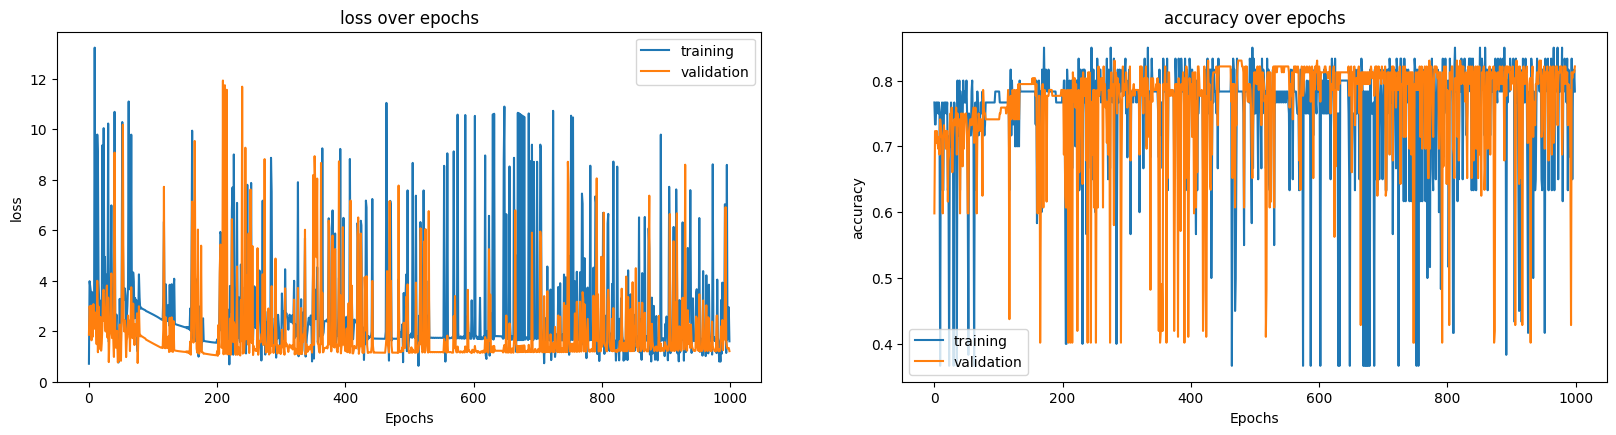

In [24]:
plot_metric(model)

## 5. Slow convergence

In [25]:
model = Sequential()

model.add(Dense(64, activation=ReLU()))
model.add(Dense(10, activation=ReLU()))
model.add(Dense(1, activation=Sigmoid()))


model.compile(loss=BinaryCrossEntropy(), optimizer=SGD(learning_rate=1e-6), metrics=[accuracy])

In [26]:
model.predict(X)[:10]

array([[0.50009085],
       [0.49997158],
       [0.50011248],
       [0.50000604],
       [0.50015813],
       [0.50006752],
       [0.49998766],
       [0.50010228],
       [0.49998757],
       [0.49999448]])

In [ ]:
model.fit(X, y, epoch=1000, validation_data=[X_val, y_val])

Epoch 1/1000 - 10 batches
train_loss: 0.69328 - train_accuracy: 0.233333 - val_loss: 0.69325 - val_accuracy: 0.330357 - 
Epoch 2/1000 - 10 batches
train_loss: 0.69328 - train_accuracy: 0.233333 - val_loss: 0.69325 - val_accuracy: 0.330357 - 
Epoch 3/1000 - 10 batches
train_loss: 0.69328 - train_accuracy: 0.233333 - val_loss: 0.69325 - val_accuracy: 0.330357 - 
Epoch 4/1000 - 10 batches
train_loss: 0.69328 - train_accuracy: 0.233333 - val_loss: 0.69325 - val_accuracy: 0.330357 - 
Epoch 5/1000 - 10 batches
train_loss: 0.69328 - train_accuracy: 0.233333 - val_loss: 0.69325 - val_accuracy: 0.330357 - 
Epoch 6/1000 - 10 batches
train_loss: 0.69328 - train_accuracy: 0.233333 - val_loss: 0.69325 - val_accuracy: 0.330357 - 
Epoch 7/1000 - 10 batches
train_loss: 0.69328 - train_accuracy: 0.233333 - val_loss: 0.69325 - val_accuracy: 0.330357 - 
Epoch 8/1000 - 10 batches
train_loss: 0.693279 - train_accuracy: 0.233333 - val_loss: 0.69325 - val_accuracy: 0.330357 - 
Epoch 9/1000 - 10 batches
train

In [ ]:
plot_metric(model)

## 6. Correct Version?

In [73]:
model = Sequential()
model.add(Dense(32, activation=ReLU(), initializer=HeInitializer(mode="normal")))
model.add(Dense(10, activation=ReLU(), initializer=HeInitializer(mode="normal")))
# model.add(Dropout(0.5))
model.add(Dense(1, activation=Sigmoid(), initializer=XavierInitializer(mode="uniform")))


model.compile(loss=BinaryCrossEntropy(), optimizer=Adam(learning_rate=1e-4), metrics=[accuracy])

In [74]:
model.predict(X)[:10]

array([[9.94854554e-01],
       [1.31110140e-04],
       [9.99602231e-01],
       [3.18966079e-02],
       [9.99976387e-01],
       [9.73408899e-01],
       [1.39582594e-04],
       [9.99705802e-01],
       [5.81087662e-03],
       [7.79597819e-03]])

In [75]:
model.evaluate(X_val, y_val)

{'loss': 6.822793, 'accuracy': 0.294643}

In [76]:
model.fit(X, y, epoch=1)

Epoch 1/1 - 10 batches
train_loss: 8.641256 - train_accuracy: 0.266667 - 


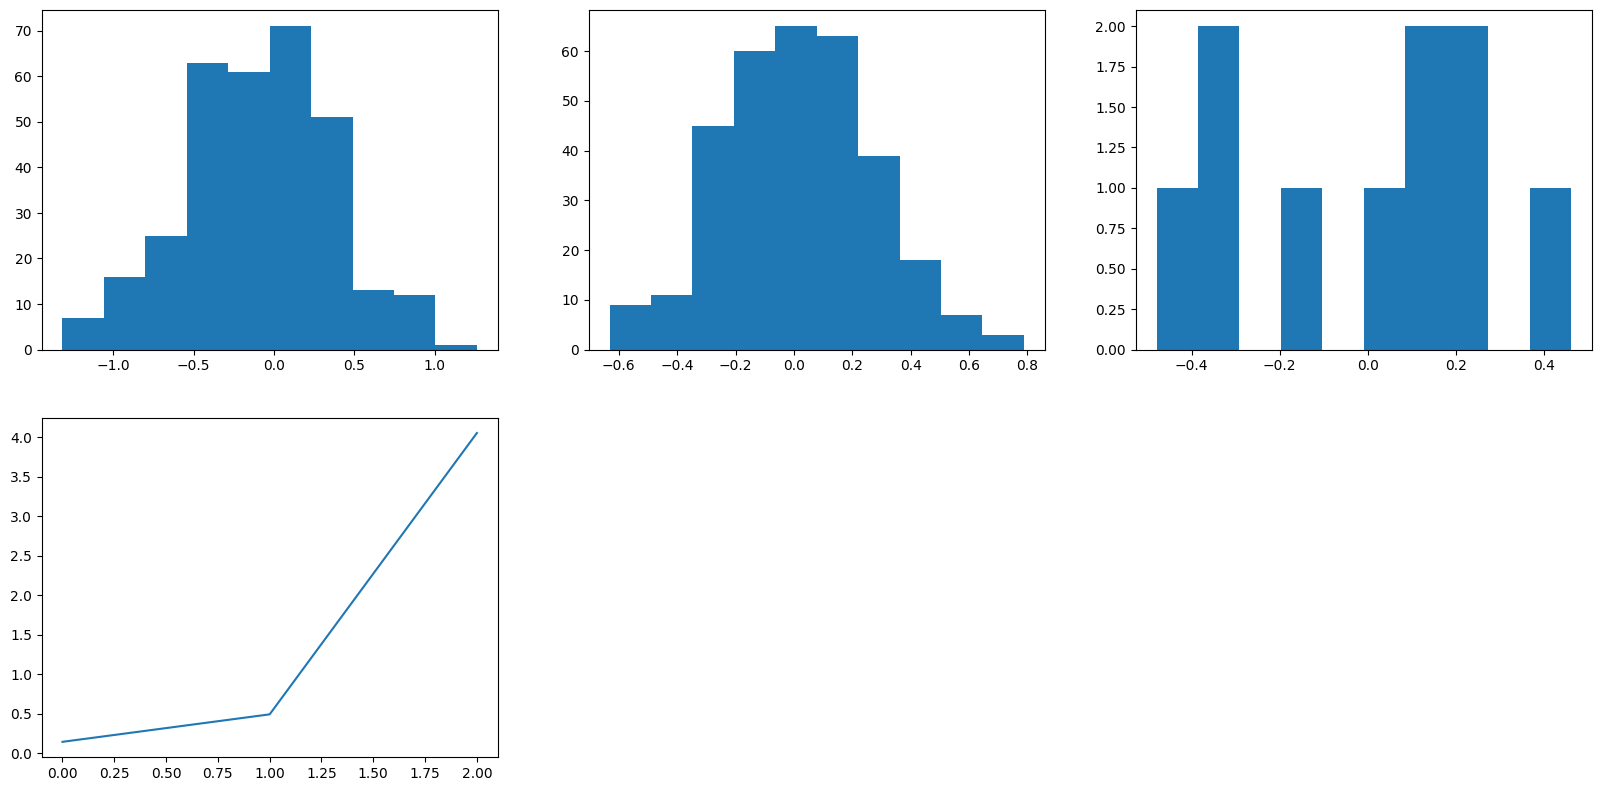

In [77]:
plot_W(model)

In [83]:
model.fit(X, y, validation_data=[X_val, y_val], epoch=2000, batch_size=32, shuffle=True)

Epoch 1/2000 - 19 batches
train_loss: 0.351827 - train_accuracy: 0.870968 - val_loss: 0.348131 - val_accuracy: 0.839286 - 
Epoch 2/2000 - 19 batches
train_loss: 0.351585 - train_accuracy: 0.870968 - val_loss: 0.34806 - val_accuracy: 0.839286 - 
Epoch 3/2000 - 19 batches
train_loss: 0.35153 - train_accuracy: 0.870968 - val_loss: 0.348042 - val_accuracy: 0.839286 - 
Epoch 4/2000 - 19 batches
train_loss: 0.351622 - train_accuracy: 0.870968 - val_loss: 0.348077 - val_accuracy: 0.839286 - 
Epoch 5/2000 - 19 batches
train_loss: 0.351788 - train_accuracy: 0.870968 - val_loss: 0.348117 - val_accuracy: 0.839286 - 
Epoch 6/2000 - 19 batches
train_loss: 0.351608 - train_accuracy: 0.870968 - val_loss: 0.348029 - val_accuracy: 0.839286 - 
Epoch 7/2000 - 19 batches
train_loss: 0.351634 - train_accuracy: 0.870968 - val_loss: 0.348082 - val_accuracy: 0.839286 - 
Epoch 8/2000 - 19 batches
train_loss: 0.351827 - train_accuracy: 0.870968 - val_loss: 0.348134 - val_accuracy: 0.839286 - 
Epoch 9/2000 - 19 

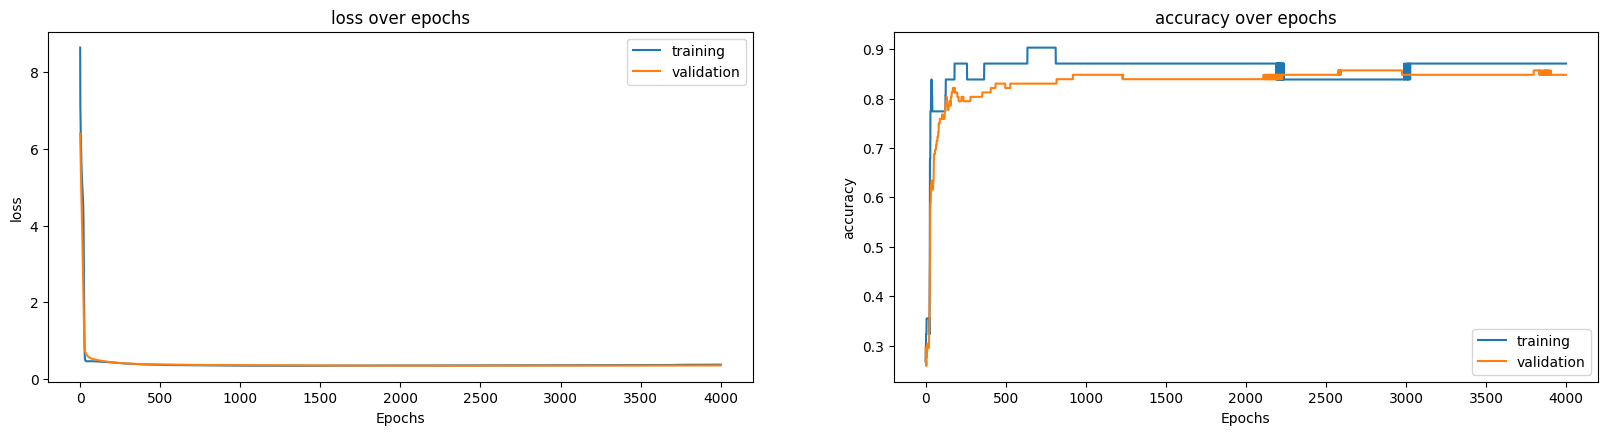

In [84]:
plot_metric(model)

In [85]:
model.evaluate(X_val, y_val)

{'loss': 0.352362, 'accuracy': 0.848214}